This is the last version of Notebook that works with database [kaggle.com/imdevskp/corona-virus-report](https://www.kaggle.com/imdevskp/corona-virus-report).<br>
Since this version used the other dataset, it can be used for checking of the new program.

Used database: [kaggle.com/imdevskp/corona-virus-report](https://www.kaggle.com/imdevskp/corona-virus-report)<br>
Alternative database: [github.com/CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv)<br>
Results of an analogous project: [life-xl.com/covid19.php](https://life-xl.com/covid19.php)

In [1]:
import pandas as pd
import datetime
%matplotlib inline

PATH_DB = '/media/l3m/LinuxFilesBig/1-datasets/COVID-19/'

In [2]:
# Load data from disk in Notebook
data_ac = pd.read_csv(PATH_DB+'COVID-19_kaggle_db.csv', parse_dates=['Date'])  # data_accumulated
data_ac.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0


<br>

### Prepare data

In [3]:
# remove redundant columns
data_ac.drop(['Province/State', 'Lat', 'Long',], axis=1, inplace=True)

# rename column for convenience
data_ac.rename(columns={'Country/Region':'Country'}, inplace=True)

print(data_ac.shape)
data_ac.head(3)

(16884, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0


In [4]:
# combine data from different provinces, so show data only per countries
data_ac = data_ac.groupby(['Country', 'Date']) \
                 .agg({'Confirmed': 'sum',
                       'Deaths': 'sum',
                       'Recovered': 'sum'}) \
                 .reset_index()

print(data_ac.shape)
data_ac.head(3)

(11859, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0


In [5]:
# summarize data for world
data_world = data_ac.groupby('Date') \
                    .agg({'Country': lambda x: '_WORLD',
                          'Date': lambda x: x.iloc[0],
                          'Confirmed': 'sum',
                          'Deaths': 'sum',
                          'Recovered': 'sum'}).reset_index(drop=True)
data_world

,Country,Date,Confirmed,Deaths,Recovered
0,_WORLD,2020-01-22,555,17,28
1,_WORLD,2020-01-23,654,18,30
2,_WORLD,2020-01-24,941,26,36
3,_WORLD,2020-01-25,1434,42,39
4,_WORLD,2020-01-26,2118,56,52
...,...,...,...,...,...
62,_WORLD,2020-03-24,418045,18625,107890
63,_WORLD,2020-03-25,467653,21181,113604
64,_WORLD,2020-03-26,529591,23970,121966
65,_WORLD,2020-03-27,593291,27198,130659


In [6]:
data_ac = pd.concat([data_ac, data_world]) \
            .reset_index(drop=True)

data_ac

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
11921,_WORLD,2020-03-24,418045,18625,107890
11922,_WORLD,2020-03-25,467653,21181,113604
11923,_WORLD,2020-03-26,529591,23970,121966
11924,_WORLD,2020-03-27,593291,27198,130659


<br>

### Countries with the highest numbers of confirmed cases

In [7]:
# Create additional DataFrame, containing only information about total cases
total_cases = data_ac.groupby('Country') \
                     .apply(lambda gr: gr.iloc[-1]) \
                     .reset_index(drop=True)

total_cases

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-03-28,110,4,2
1,Albania,2020-03-28,197,10,31
2,Algeria,2020-03-28,454,29,31
3,Andorra,2020-03-28,308,3,1
4,Angola,2020-03-28,5,0,0
...,...,...,...,...,...
173,Vietnam,2020-03-28,174,0,21
174,West Bank and Gaza,2020-03-28,98,1,18
175,Zambia,2020-03-28,28,0,0
176,Zimbabwe,2020-03-28,7,1,0


In [8]:
total_cases = total_cases.sort_values(by='Confirmed', ascending=False) \
                         .reset_index(drop=True)

# Show total statistics for world and countries with the highest numbers of confirmed cases
total_cases.head(60)

,Country,Date,Confirmed,Deaths,Recovered
0,_WORLD,2020-03-28,660706,30652,138949
1,US,2020-03-28,121478,2026,1072
2,Italy,2020-03-28,92472,10023,12384
3,China,2020-03-28,81999,3299,75100
4,Spain,2020-03-28,73235,5982,12285
5,Germany,2020-03-28,57695,433,8481
6,France,2020-03-28,38105,2317,5724
7,Iran,2020-03-28,35408,2517,11679
8,United Kingdom,2020-03-28,17312,1021,151
9,Switzerland,2020-03-28,14076,264,1530


<br>

### Create a table revealing of new cases

In [9]:
# Till now DataFrame contains total number of cases.
# Change it to the number of new cases per day (calculate it as difference b/w neighbouring rows)
data_dynamics = pd.concat([data_ac[['Country', 'Date']],
                           data_ac[['Confirmed', 'Deaths', 'Recovered']].diff()
                          ], axis='columns') \
                  .reset_index(drop=True)

print(data_dynamics.shape)
data_dynamics.head(3)

(11926, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0


In [10]:
# Now the first row (earliest day of observatopm) for each country contains garbage.
# So, delete the earliest data for each country

def delete_earliest_data(gr):
    gr.drop(gr.index[0], inplace=True)
    return gr
    
data_dynamics = data_dynamics.groupby(['Country']) \
                             .apply(delete_earliest_data) \
                             .reset_index(drop=True)

# Correct type of some columns back to int
data_dynamics[['Confirmed', 'Deaths', 'Recovered']] = \
    data_dynamics[['Confirmed', 'Deaths', 'Recovered']].astype('int')

print(data_dynamics.shape)
data_dynamics.head(3)

(11748, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-23,0,0,0
1,Afghanistan,2020-01-24,0,0,0
2,Afghanistan,2020-01-25,0,0,0


<br>

### Create graphs

In [11]:
LAST_DATE_GLOBAL = data_ac['Date'].max()  # last_date = datetime.datetime(2020, 3, 25)
NUMBER_OF_DAYS_GLOBAL = 30

In [12]:
def extract_df(df_overall, country_name=None, last_date=datetime.datetime.now(), number_of_days=90):
    """Extract from overall DataFrame sub-DataFrame according given limitations.
    
    :df_overall:     overall (big) DataFrame
    :country_name:   name of country
    :last_date:      last date till that the graph will be shown
    :number_of_days: number of days in the graph
    :return:         sub-DateFrame
    """
    first_date = last_date + datetime.timedelta(days=-number_of_days+1)

    if country_name:
        sub_df = df_overall[(df_overall['Country'] == country_name) &
                            (df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]
    else:
        sub_df = df_overall[(df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]

    return sub_df    

In [13]:
def build_graph(df, *, title_text=None):
    # create index to set proper appearance of x-axis
    df.index = df['Date'].dt.strftime('%b-%d')
    
    # remove label 'Date' from the x-axis
    df.rename_axis(None, axis='rows', inplace=True)
    
    df['Confirmed'].plot(kind='bar', width=1, title=title_text,
                         color=['#C07800', '#D0810F'], figsize=(20,6), fontsize=14)
    
    return None

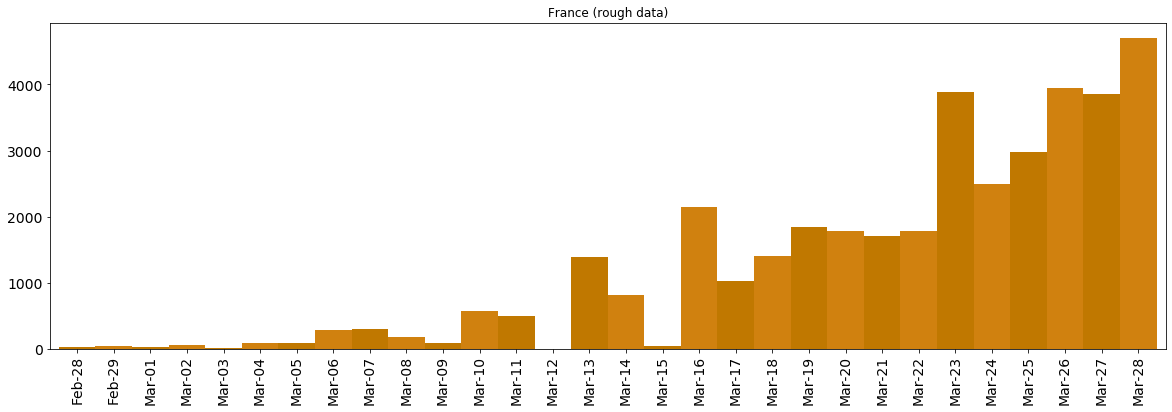

In [14]:
# Build graph for a separate country.
# Set country, the last day of shown results, and the number of days for showing
country_name = 'France'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)

build_graph(country_graph, title_text=country_name+' (rough data)')

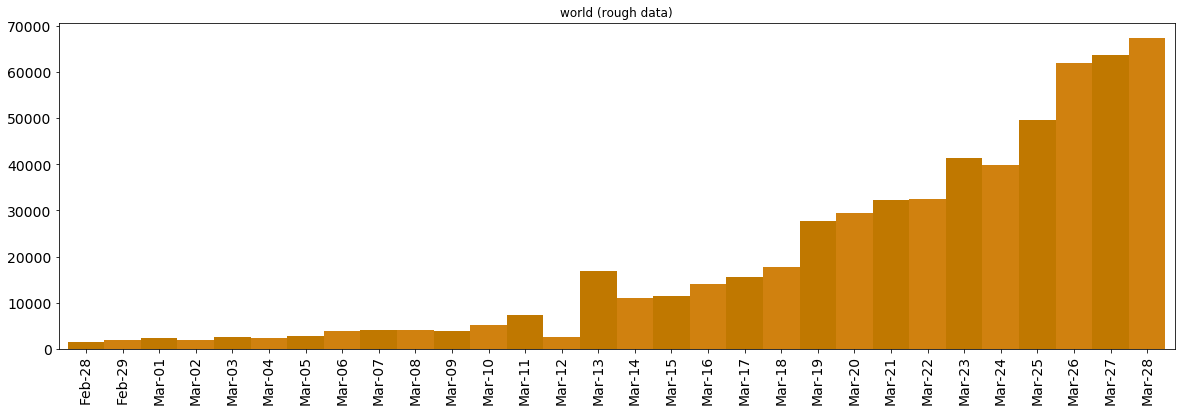

In [15]:
# build graph for the world

last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

world_graph = extract_df(data_dynamics, '_WORLD', last_date, number_of_days)

build_graph(world_graph, title_text='world (rough data)')

<br>

### Create smoothed graphs

We can see in the graphs that occasionally a day of high revealing of infection adjoins with a day of low revealing. I suggest to smooth the data, taking for each day an average value between three adjacent days.

In [16]:
def smooth_df(df):
    
    def smooth_column_values(column):
        ls = list(column)
        lng = len(ls)

        smoothed_values = [] 
        
        smoothed_values.append(round((ls[0]*2 + ls[1]) / 3, 2))
        smoothed_values.extend([round((ls[i-1] + ls[i] + ls[i+1]) / 3, 2) for i in range(1, lng-1)])
        smoothed_values.append(round((ls[lng-2] + ls[lng-1]*2) / 3, 2))
    
        return smoothed_values

    df_smoothed = df.copy()
    for col_name in ['Confirmed', 'Deaths', 'Recovered']:
        df_smoothed[col_name] = smooth_column_values(df_smoothed[col_name])
        
    return df_smoothed

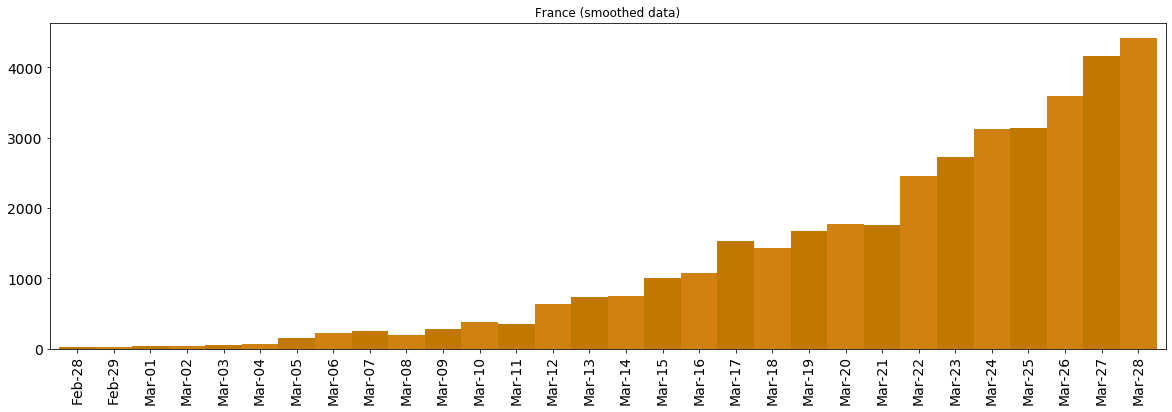

In [17]:
# Create smoothed graph for a separate country
country_name = 'France'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

country_smoothed = smooth_df(extract_df(data_dynamics, country_name, last_date, number_of_days))

build_graph(country_smoothed, title_text=country_name+' (smoothed data)')

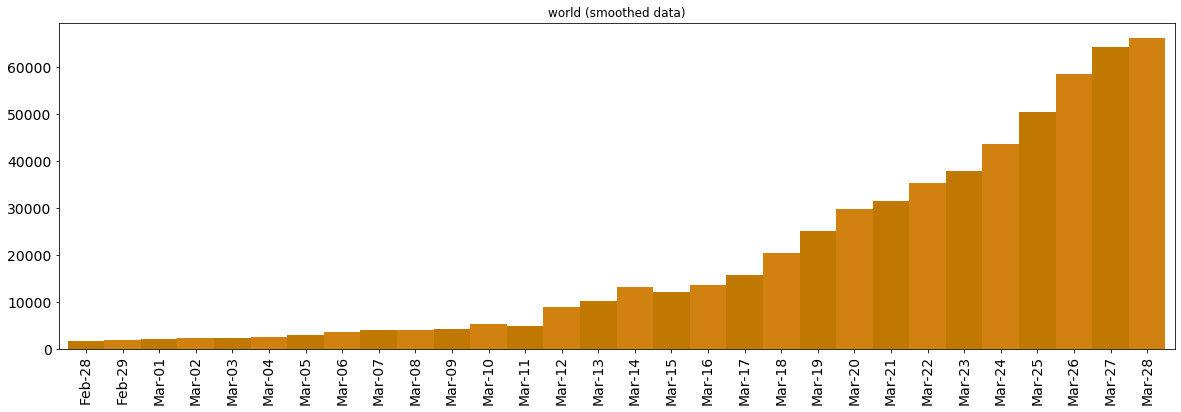

In [18]:
# Create smoothed graph for the world
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

world_smoothed = smooth_df(extract_df(data_dynamics, '_WORLD', last_date, number_of_days))

build_graph(world_smoothed, title_text='world (smoothed data)')

In [19]:
# test
world_smoothed

,Country,Date,Confirmed,Deaths,Recovered
Feb-28,_WORLD,2020-02-28,1543.67,61.67,3313.00
Feb-29,_WORLD,2020-02-29,1874.33,60.67,3146.33
Mar-01,_WORLD,2020-03-01,2064.67,71.00,2963.67
Mar-02,_WORLD,2020-03-02,2276.33,73.00,2815.33
Mar-03,_WORLD,2020-03-03,2250.33,86.00,2818.00
Mar-04,_WORLD,2020-03-04,2526.67,87.67,2731.33
Mar-05,_WORLD,2020-03-05,2987.00,100.00,2545.67
Mar-06,_WORLD,2020-03-06,3575.67,101.33,2395.33
Mar-07,_WORLD,2020-03-07,3978.33,151.33,2298.67
Mar-08,_WORLD,2020-03-08,3929.67,176.00,2209.00


<br>

### Comparison of several countries

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)  # plt.rc('figure', figsize=(20, 6))
plt.rcParams['font.size'] = 14            # plt.rc('font', size=14)

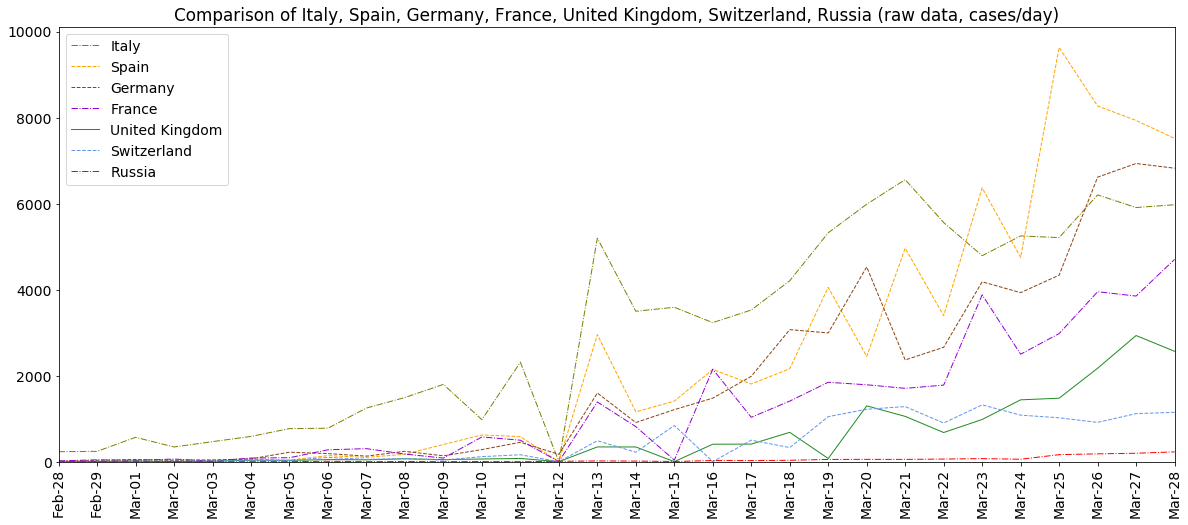

In [21]:
# for original rough data
countries = ['Italy', 'Spain', 'Germany', 'France', 'United Kingdom', 'Switzerland', 'Russia']
colors = ['olive', 'orange', 'saddlebrown', 'darkviolet', 'forestgreen', 'cornflowerblue', 'red']
styles = ['-.', '--', '--', '-.', '-', '--', '-.']

last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

for i, country_name in enumerate(countries):
    country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)
    plt.plot(country_graph['Date'].dt.strftime('%b-%d'), country_graph['Confirmed'],
             color=colors[i], linestyle=styles[i], linewidth=1, label=country_name)

plt.title(f"Comparison of {', '.join(countries)} (raw data, cases/day)")
plt.margins(x=0)
plt.ylim(0)

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

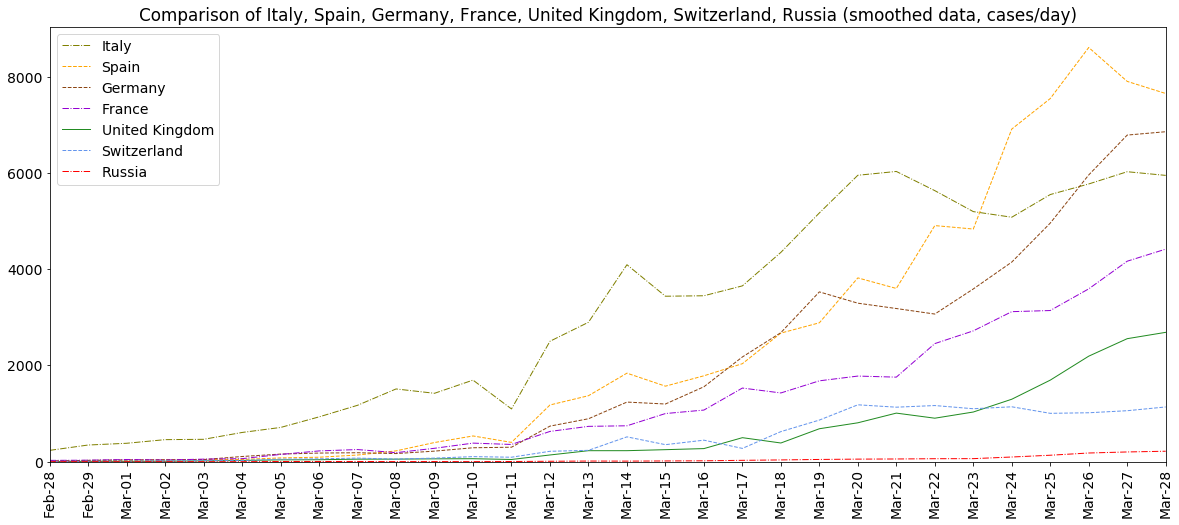

In [22]:
# for smoothed data
countries = ['Italy', 'Spain', 'Germany', 'France', 'United Kingdom', 'Switzerland', 'Russia']
colors = ['olive', 'orange', 'saddlebrown', 'darkviolet', 'forestgreen', 'cornflowerblue', 'red']
styles = ['-.', '--', '--', '-.', '-', '--', '-.']

last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

for i, country_name in enumerate(countries):
    country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)
    southed_graph = smooth_df(country_graph)
    plt.plot(southed_graph['Date'].dt.strftime('%b-%d'), southed_graph['Confirmed'],
             color=colors[i], linestyle=styles[i], linewidth=1, label=country_name)

plt.title(f"Comparison of {', '.join(countries)} (smoothed data, cases/day)")
plt.margins(x=0)
plt.ylim(0)

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

<br>

### Comparison of dynamics after the first n confirmed cases
(beginning from the day than this limit was achieved)<br>
Caution: don't use China for this conparison since the table doesn't contain information about the first cases in this country.

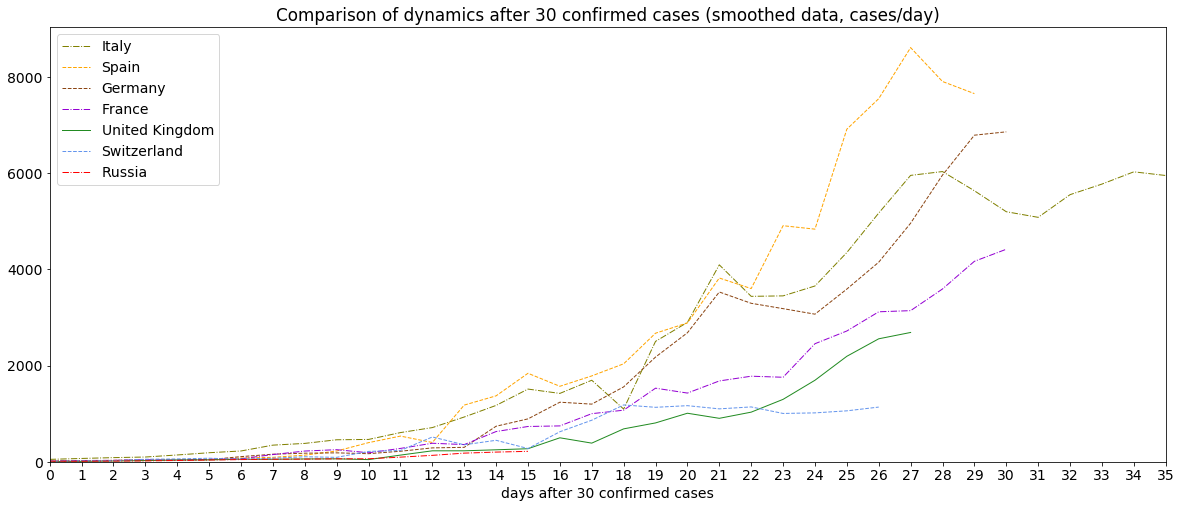

In [23]:
# used smoothed data
countries = ['Italy', 'Spain', 'Germany', 'France', 'United Kingdom', 'Switzerland', 'Russia']
colors = ['olive', 'orange', 'saddlebrown', 'darkviolet', 'forestgreen', 'cornflowerblue', 'red']
styles = ['-.', '--', '--', '-.', '-', '--', '-.']
MIN_LIMIT = 30

max_lng = 0

for i, country in enumerate(countries):
    min_date = data_ac[(data_ac['Country'] == country) & ((data_ac['Confirmed'] >= MIN_LIMIT))]['Date'].min()
    
    country_graph = smooth_df(data_dynamics[data_dynamics['Country'] == country])
    country_graph = country_graph[country_graph['Date'] >= min_date].reset_index(drop=True)
    if len(country_graph) > max_lng:
        max_lng = len(country_graph)
    plt.plot(country_graph.index, country_graph['Confirmed'],
             color=colors[i], linestyle=styles[i], linewidth=1, label=country)
    
plt.margins(x=0)
plt.ylim(0)

labels = range(max_lng)
plt.xticks(labels)

plt.title(f'Comparison of dynamics after {MIN_LIMIT} confirmed cases (smoothed data, cases/day)')
plt.legend(loc='upper left')
plt.xlabel(f'days after {MIN_LIMIT} confirmed cases')

plt.show()